In [188]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels)=reuters.load_data(num_words=10000)

In [189]:
len(train_data)

8982

In [190]:
len(test_data)

2246

In [191]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key)for(key, value)in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

In [192]:
train_labels[10]

3

In [193]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [194]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [195]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [196]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(12800, activation='relu'))
model.add(layers.Dense(1280, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [197]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [198]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [199]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs= 12,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/12
7982/7982 [==============================] - 8s 980us/step - loss: 2.3706 - accuracy: 0.4578 - val_loss: 1.6300 - val_accuracy: 0.5820
Epoch 2/12
7982/7982 [==============================] - 7s 937us/step - loss: 1.4589 - accuracy: 0.6407 - val_loss: 1.4255 - val_accuracy: 0.6900
Epoch 3/12
7982/7982 [==============================] - 8s 942us/step - loss: 1.0907 - accuracy: 0.7316 - val_loss: 1.3443 - val_accuracy: 0.7080
Epoch 4/12
7982/7982 [==============================] - 8s 1ms/step - loss: 0.8534 - accuracy: 0.7729 - val_loss: 1.3492 - val_accuracy: 0.7140
Epoch 5/12
7982/7982 [==============================] - 8s 1ms/step - loss: 0.6748 - accuracy: 0.8171 - val_loss: 1.3867 - val_accuracy: 0.7250
Epoch 6/12
7982/7982 [==============================] - 8s 1ms/step - loss: 0.5338 - accuracy: 0.8572 - val_loss: 1.3943 - val_accuracy: 0.7360
Epoch 7/12
7982/7982 [==============================] - 8s 1ms/step - loss: 0.4301

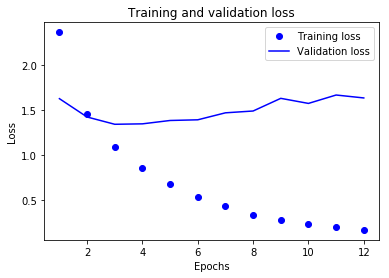

In [200]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<function matplotlib.pyplot.show>

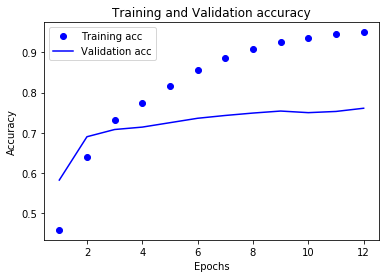

In [201]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [202]:
results

[1.8784268575381298, 0.7546749711036682]